# Workearly Final Assignment: Iowa Liquor Sales Analysis

This Jupyter Notebook simulates the full workflow of a Data Analyst—from extracting data from a database, manipulating it using Python and Pandas, to presenting insights through Matplotlib and Tableau.

## Table of Contents

1. [Project Overview](#Project-Overview)
2. [Setup and Imports](#Setup-and-Imports)
3. [Data Loading](#Data-Loading)
4. [Data Preprocessing](#Data-Preprocessing)
5. [Data Exploration and Aggregation](#Data-Exploration-and-Aggregation)
    - [Most Popular Item per Zipcode](#Most-Popular-Item-per-Zipcode)
    - [Percentage of Sales per Store (2016-2019)](#Percentage-of-Sales-per-Store-2016-2019)
6. [Data Visualization](#Data-Visualization)
    - [Bottles Sold per Zipcode](#Bottles-Sold-per-Zipcode)
    - [Sales Percentage per Store](#Sales-Percentage-per-Store)
7. [Conclusion](#Conclusion)
8. [Next Steps](#Next-Steps)

---

## Project Overview

We are provided with a dataset containing liquor sales in the state of Iowa, USA, from 2012 to 2020. The objectives of this project are:

- **Identify the most popular liquor item per zipcode.**
- **Calculate the percentage of sales per store between 2016 and 2019.**

All calculations and data transformations are performed using Python and Pandas. The results are visualized using Matplotlib and Tableau Public.

---

## Setup and Imports

First, let's import the necessary Python libraries for data analysis and visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline


## Data Loading

Load the dataset `liquorstore.csv` into a Pandas DataFrame.

In [3]:
# Define the file path
data_file = '../data/liquorstore.csv'

# Load the data into a DataFrame
df = pd.read_csv(data_file)

# Display the first five rows of the DataFrame
df.head()


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-23548800092,2019-11-27 00:00:00,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
1,INV-23609300026,2019-12-02 00:00:00,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803.0,NaN,82,SCOTT,...,41844,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29
2,S30390600011,2016-01-26 00:00:00,2641,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.855054 41.261673),78,Pottawattamie,...,81124,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,1.20,0.32
3,S30348700047,2016-01-25 00:00:00,3162,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761.0,POINT (-91.06411300000002 41.408437),70,Muscatine,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.00,1.06
4,S30466200002,2016-02-01 00:00:00,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77,Polk,...,973627,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,120.00,31.70


## Data Preprocessing

Perform initial data preprocessing, including data type conversions and handling missing values.

In [4]:
# Check the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  74 non-null     object 
 1   date                     74 non-null     object 
 2   store_number             74 non-null     int64  
 3   store_name               74 non-null     object 
 4   address                  74 non-null     object 
 5   city                     74 non-null     object 
 6   zip_code                 74 non-null     float64
 7   store_location           65 non-null     object 
 8   county_number            74 non-null     int64  
 9   county                   74 non-null     object 
 10  category                 74 non-null     int64  
 11  category_name            68 non-null     object 
 12  vendor_number            74 non-null     int64  
 13  vendor_name              74 non-null     object 
 14  item_number              74 

In [5]:
# Convert 'zip_code' to integer type
df['zip_code'] = df['zip_code'].astype(int)

# Verify the conversion
df['zip_code'].dtype

# Check for missing values
df.isnull().sum()

# Fill missing values with zeros
df.fillna({'bottles_sold': 0, 'sale_dollars': 0}, inplace=True)

# Verify that there are no more missing values
df.isnull().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             9
county_number              0
county                     0
category                   0
category_name              6
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

## Data Exploration and Aggregation

### Most Popular Item per Zipcode

In [9]:
# Group by 'zip_code' and 'item_description' and sum the bottles sold
zip_item_sales = df.groupby(['zip_code', 'item_description'])['bottles_sold'].sum().reset_index()

# For each zipcode, find the item with the maximum bottles sold
most_popular_items = zip_item_sales.loc[zip_item_sales.groupby('zip_code')['bottles_sold'].idxmax()]

# Display the most popular items per zipcode
most_popular_items.head()


,zip_code,item_description,bottles_sold
0,50010,Member's Mark Spiced Rum,288
1,50022,Paramount Triple Sec,4
2,50111,Saints N Sinners Apple Pie,108
3,50131,Platinum 7x Vodka,48
4,50158,Hennessy VS,24


### Percentage of Sales per Store (2016-2019)

In [12]:
# Convert 'date' to datetime format
df['date_of_sale'] = pd.to_datetime(df['date'])

# Filter data between 2016 and 2019
mask = (df['date_of_sale'].dt.year >= 2016) & (df['date_of_sale'].dt.year <= 2019)
df_2016_2019 = df.loc[mask]

# Group by 'store_name' and sum the sale dollars
store_sales = df_2016_2019.groupby('store_name')['sale_dollars'].sum().reset_index()

# Calculate total sales
total_sales = store_sales['sale_dollars'].sum()

# Calculate percentage of sales per store
store_sales['sales_percentage'] = (store_sales['sale_dollars'] / total_sales) * 100

# Display the sales percentages
store_sales.head()


,store_name,sale_dollars,sales_percentage
0,Bootleggin' Barzini's Fin,6.75,0.011017
1,Burlington Shell,206.64,0.337282
2,CVS Pharmacy #8526 / Cedar Rapids,42.00,0.068553
3,Cedar Ridge Vineyards,3712.50,6.059624
4,Central City 2,2580.60,4.212112


## Data Visualization
### Bottles Sold per Zipcode

C:\Users\rotas\AppData\Local\Temp\ipykernel_14708\2194305858.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zip_code', y='bottles_sold', data=bottles_per_zip_sorted.head(20), palette='viridis')


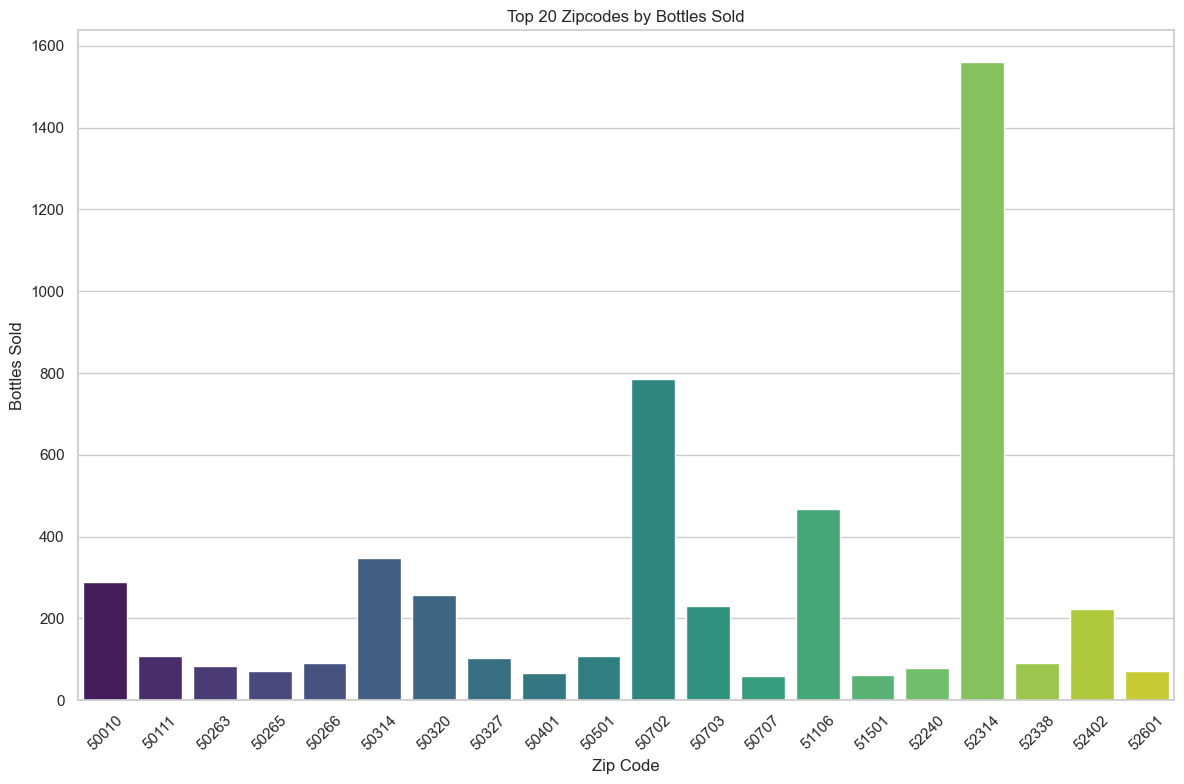

In [13]:
# Aggregate total bottles sold per zipcode
bottles_per_zip = df.groupby('zip_code')['bottles_sold'].sum().reset_index()

# Sort the data for better visualization
bottles_per_zip_sorted = bottles_per_zip.sort_values(by='bottles_sold', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='zip_code', y='bottles_sold', data=bottles_per_zip_sorted.head(20), palette='viridis')
plt.title('Top 20 Zipcodes by Bottles Sold')
plt.xlabel('Zip Code')
plt.ylabel('Bottles Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sales Percentage per Store

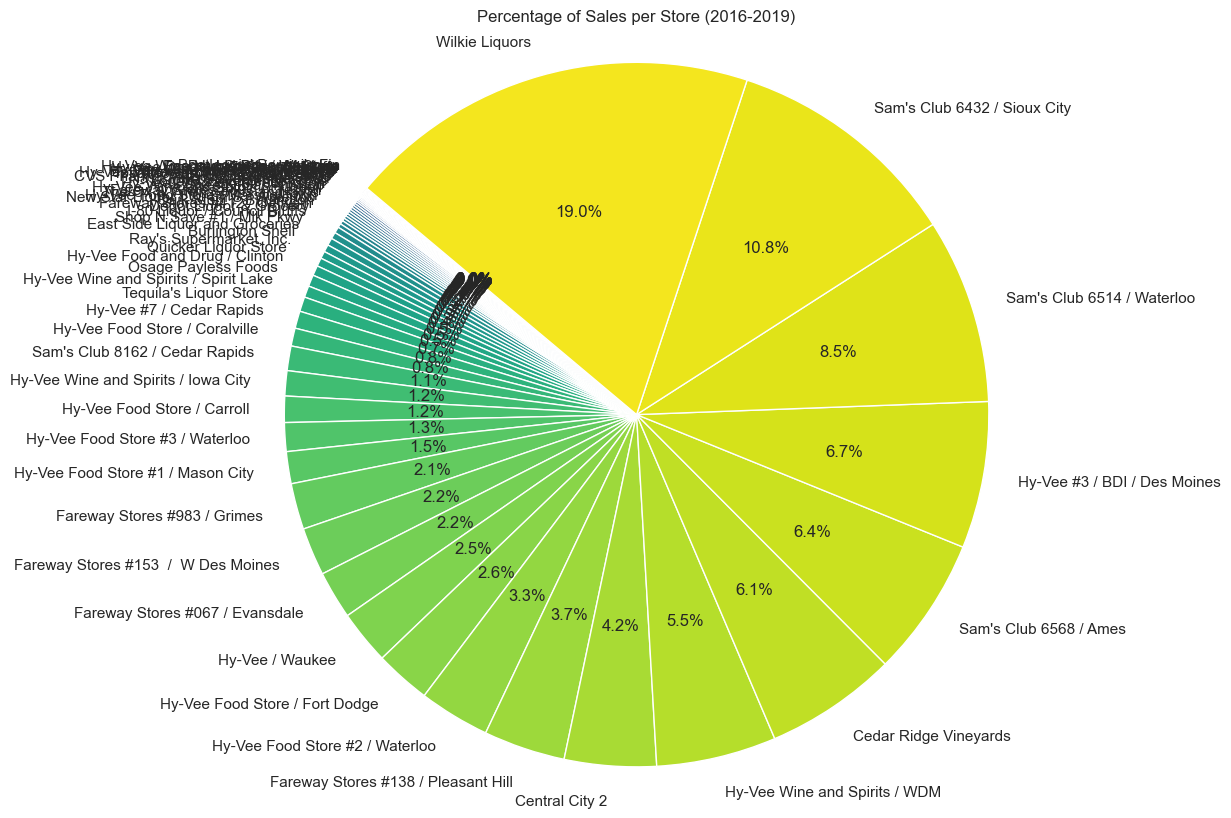

In [14]:
# Prepare data for pie chart
store_sales_sorted = store_sales.sort_values(by='sales_percentage', ascending=True)

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(store_sales_sorted['sales_percentage'], labels=store_sales_sorted['store_name'], 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(store_sales_sorted)))
plt.title('Percentage of Sales per Store (2016-2019)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
